# K-Nearest Neighbours

K-Nearest Neighbours (KNN) is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. **Ease to interpret output**
2. **Calculation time**
3. **Predictive Power**

In [353]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [354]:
# Import Dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


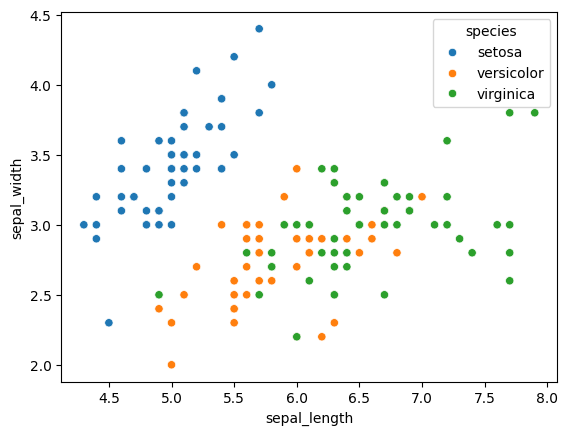

In [355]:
# scatter plot of the data
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

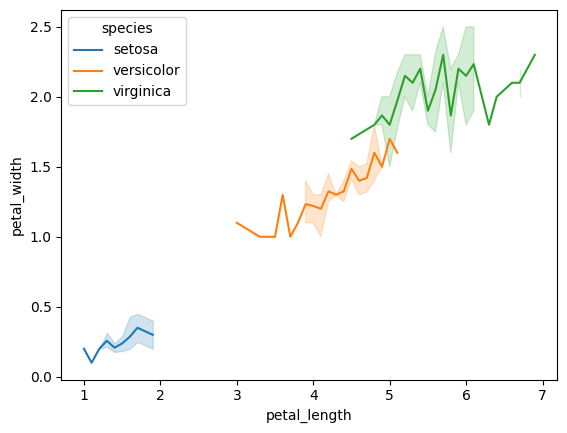

In [356]:
# lineplot of the data
sns.lineplot(x='petal_length', y='petal_width', hue='species', data=df)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [358]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [359]:
# encode category columns using for loop and label encoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'category':
        df[col] = le.fit_transform(df[col])

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [361]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [362]:
# scaler = MinMaxScaler()
# df[['total_bill', 'tip']] = scaler.fit_transform(df[['total_bill', 'tip']])
# df.head()

In [363]:
# Splitting the dataset into the Training set and Test set
X = df.drop('species', axis=1)
y = df['species']

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [365]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [366]:
# check model performance
print('Model Accuracy: ', model.score(X_test, y_test))
print('confusion_matrix: ', confusion_matrix(y_test, y_pred))
print('classification_report: ', classification_report(y_test, y_pred))

Model Accuracy:  0.9666666666666667
confusion_matrix:  [[12  0  0]
 [ 0  7  0]
 [ 0  1 10]]
classification_report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



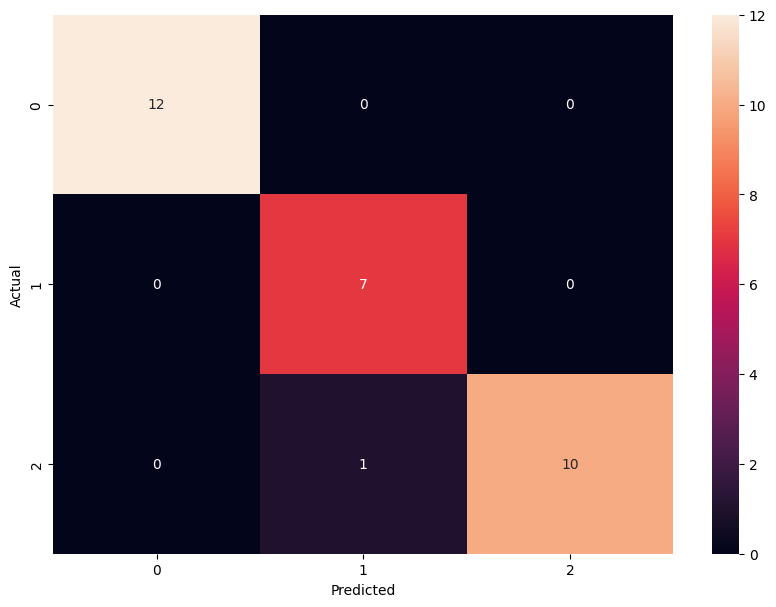

In [367]:
# heatmap of confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()